In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('binary2.arff.csv')

# Separate features (X) and target (y)
X = df.drop(columns=['CLASS'])
y = df['CLASS']

#Correlation Heatmap

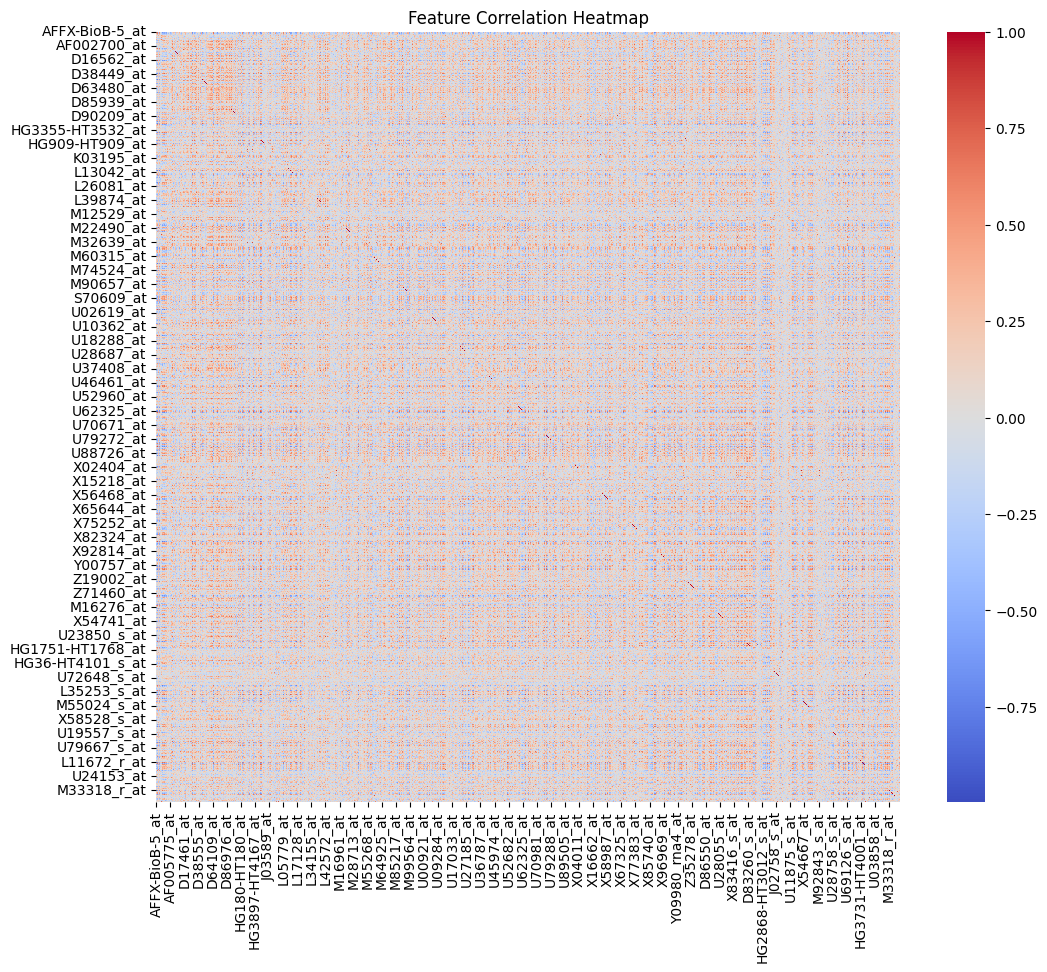

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [6]:
import seaborn as sns

# Select a subset of features for pairplot (due to high dimensionality)
subset = df[['AFFX-BioB-5_at', 'AFFX-BioC-5_at', 'AFFX-BioDn-5_at', 'CLASS']]
sns.pairplot(df, hue='CLASS')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns  # All columns except 'CLASS'

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA
plt.figure(figsize=(8, 6))
for class_value in np.unique(y):
    plt.scatter(X_pca[y == class_value, 0], X_pca[y == class_value, 1], label=f'Class {class_value}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.legend()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a single feature to plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLASS', y='AFFX-BioB-5_at', data=df)
plt.title('Boxplot of AFFX-BioB-5_at by Class')
plt.show()
